In [9]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf

# Data Preprocessing

# Identifying the train,test and validation datasets

In [12]:
    training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/user/Downloads/AIFINALPROJ/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [13]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/user/Downloads/AIFINALPROJ/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


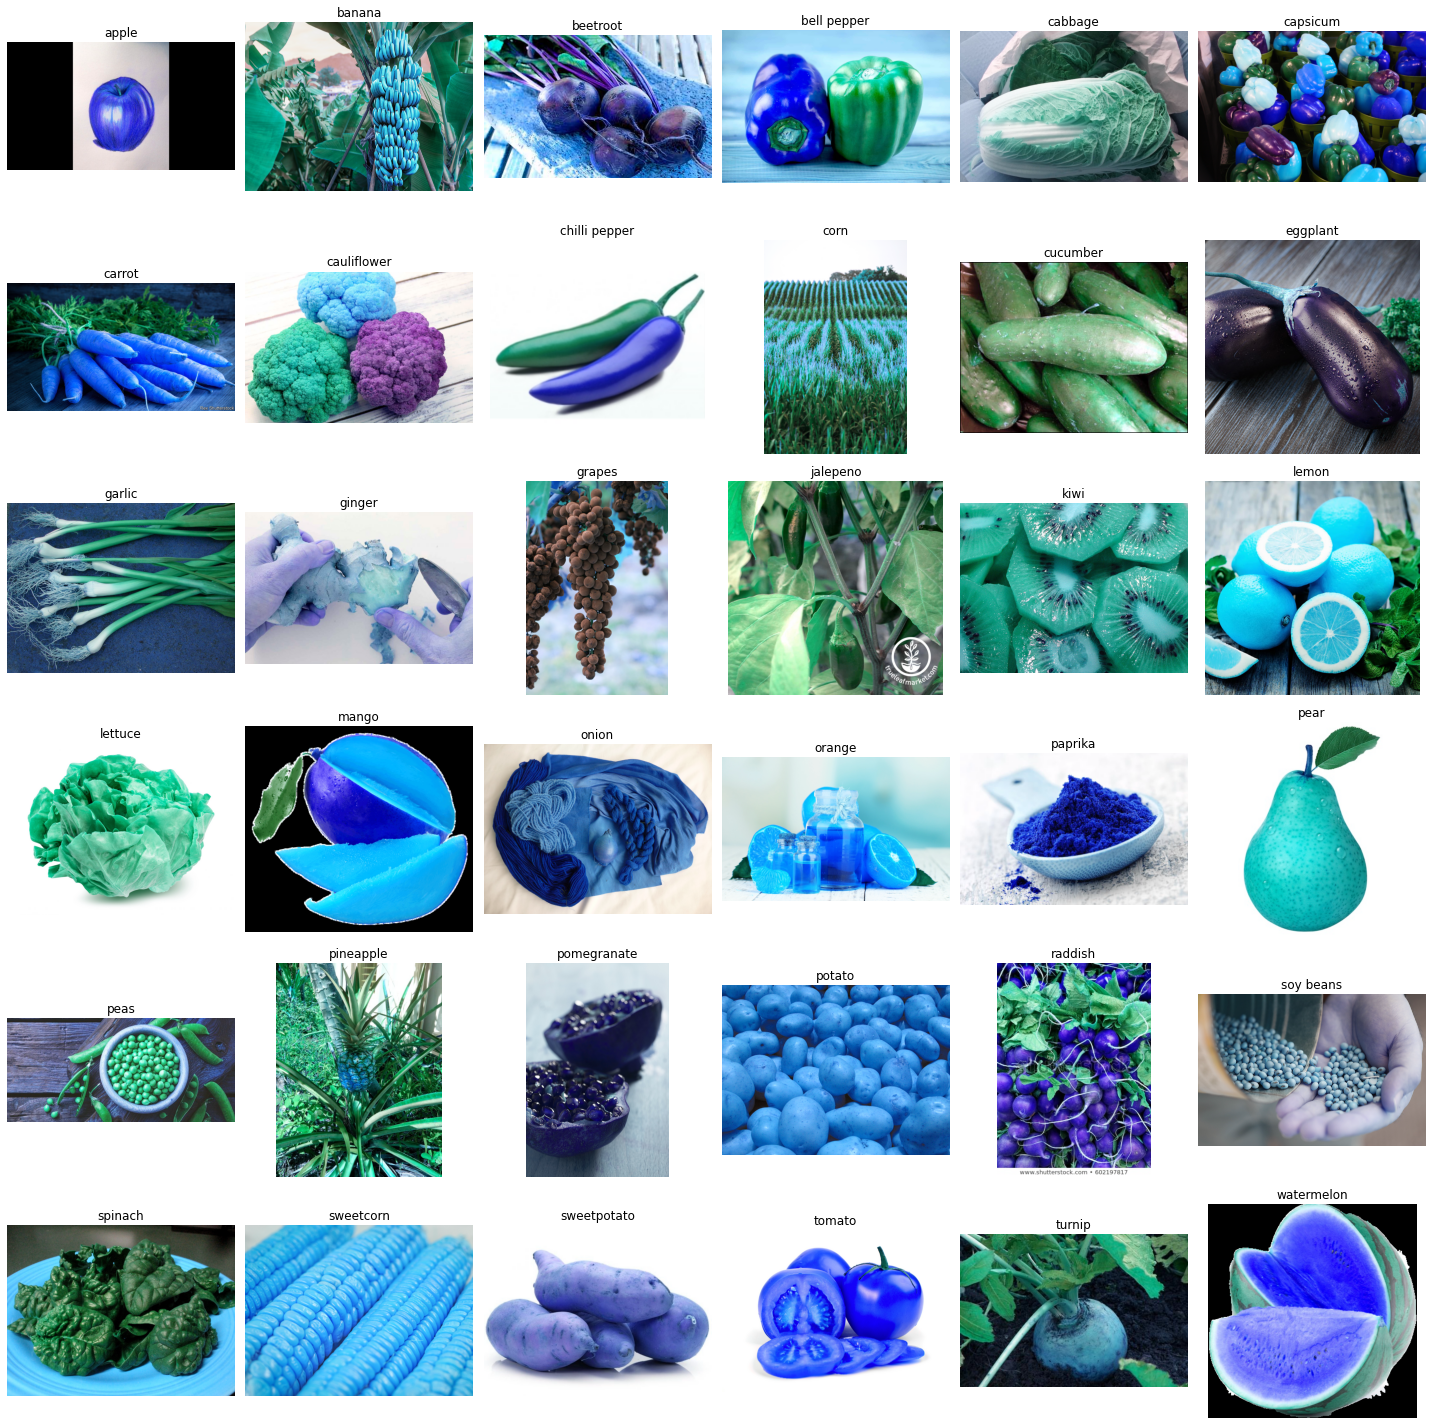

In [14]:
import os
import random
import matplotlib.pyplot as plt
import cv2


dataset_path = 'C:/Users/user/Downloads/AIFINALPROJ/train'


class_names = os.listdir(dataset_path)


num_rows = 6
num_cols = (len(class_names) + num_rows - 1) // num_rows


fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))


for i, class_name in enumerate(class_names):
    row = i // num_cols
    col = i % num_cols
    class_dir = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_dir)
    random_image = random.choice(image_files)
    image_path = os.path.join(class_dir, random_image)
    image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[row, col].imshow(image)
    axes[row, col].set_title(class_name)
    axes[row, col].axis('off')

# Remove empty subplots if there are any
for i in range(len(class_names), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])
    # Adjust spacing between subplots
plt.tight_layout()

plt.show()

# Printing class names and prictures

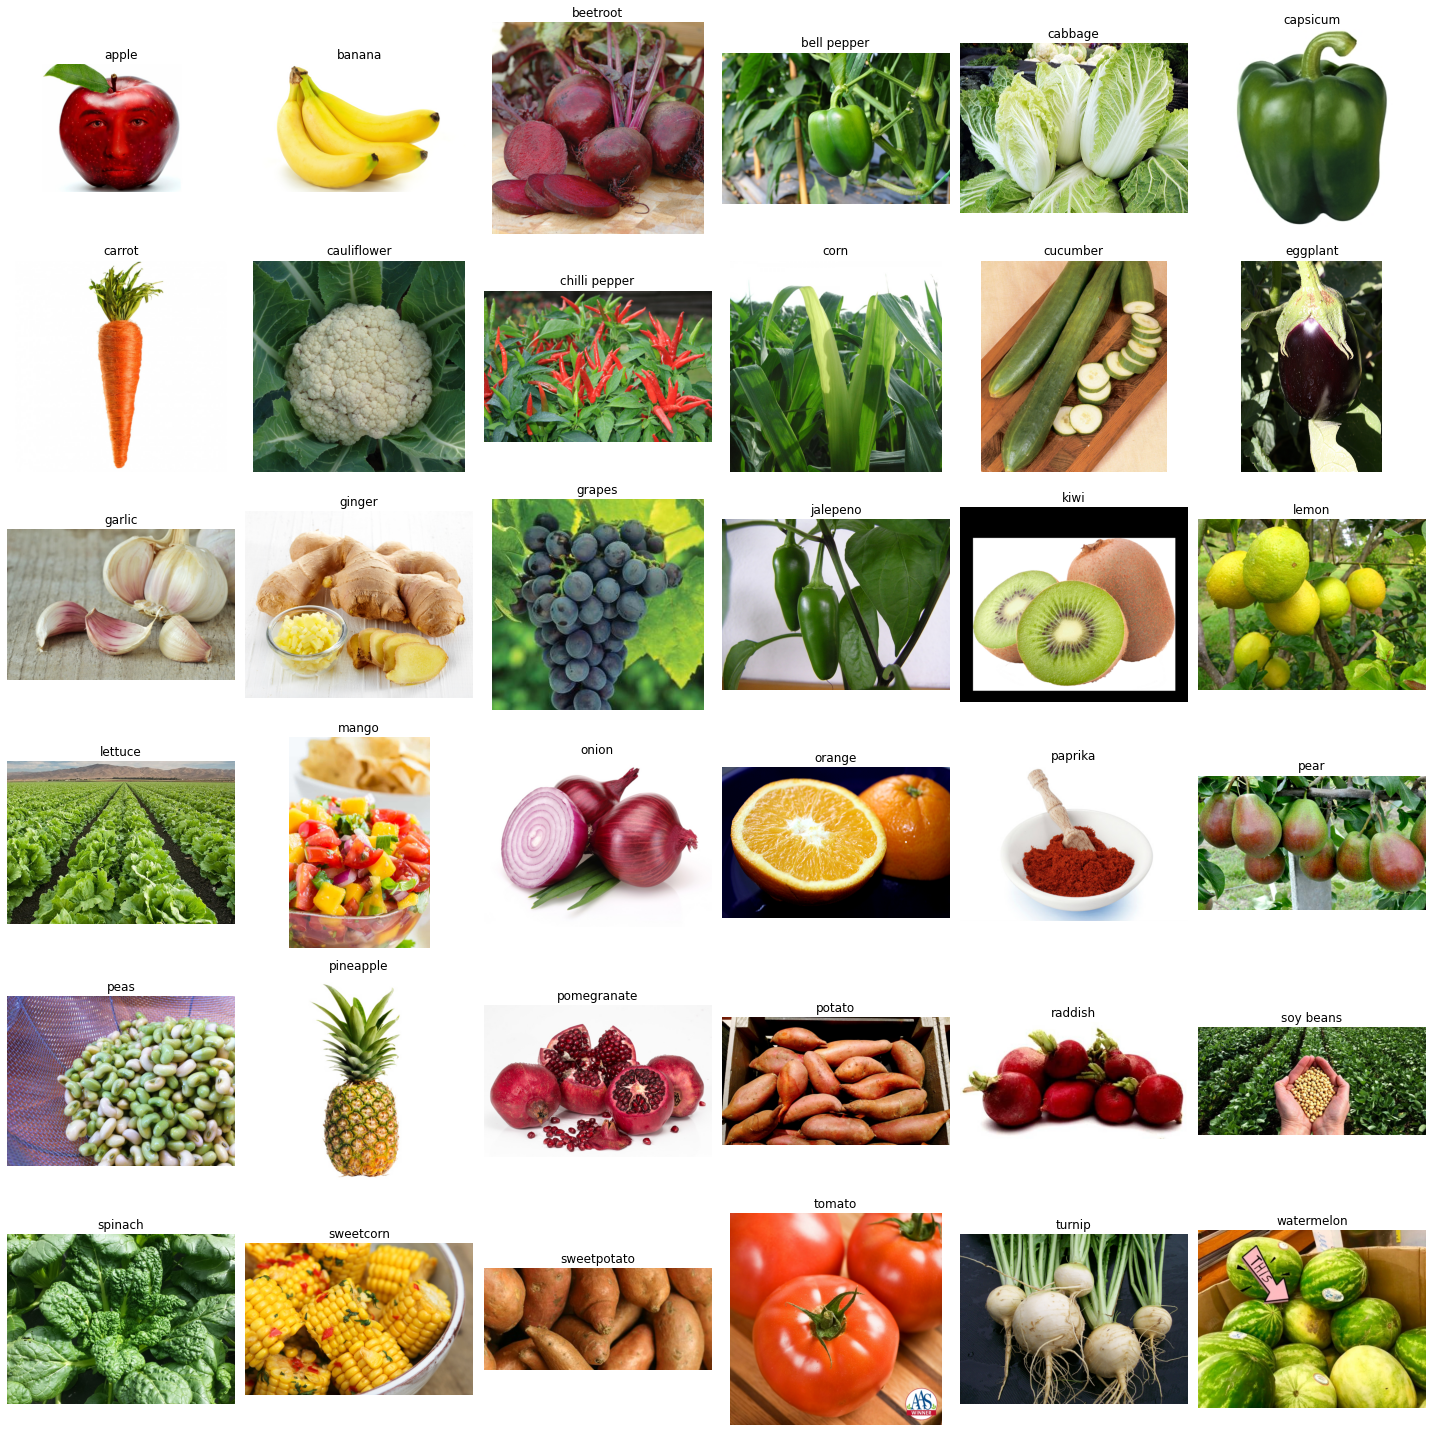

In [15]:
# Get the list of class names from the directory
class_names = os.listdir(dataset_path)

# Calculate the number of rows and columns for subplots
num_rows = 6
num_cols = (len(class_names) + num_rows - 1) // num_rows

# Create a figure and subplots to display the images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Iterate over each class and randomly select one image to display
for i, class_name in enumerate(class_names):
    row = i // num_cols
    col = i % num_cols
    class_dir = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_dir)
    random_image = random.choice(image_files)
    image_path = os.path.join(class_dir, random_image)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[row, col].imshow(image)
    axes[row, col].set_title(class_name)
    axes[row, col].axis('off')

# Remove empty subplots if there are any
for i in range(len(class_names), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

# Defining the model

In [16]:
#create an empty model with no layers.
cnn = tf.keras.models.Sequential()

# Adding layers

In [17]:

#added 32 layers size 3 with the input shape 64x64 rgb.
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
     
#It helps prevent overfitting, which is when a model performs well on the training data but poorly on new, unseen data.
#meaning that 25% of the input units will be randomly set to 0 during each training update.
cnn.add(tf.keras.layers.Dropout(0.25))
     

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
     

cnn.add(tf.keras.layers.Dropout(0.25))
     

cnn.add(tf.keras.layers.Flatten())
     

cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
     

cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
     

cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting
     

#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [18]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

# Fitting the model

In [40]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)


Epoch 1/32
98/98 [==============================] - 38s 360ms/step - loss: 6.4133 - accuracy: 0.0388 - val_loss: 3.4925 - val_accuracy: 0.0741
Epoch 2/32
98/98 [==============================] - 34s 336ms/step - loss: 3.4279 - accuracy: 0.0796 - val_loss: 3.4578 - val_accuracy: 0.1225
Epoch 3/32
98/98 [==============================] - 36s 352ms/step - loss: 3.2797 - accuracy: 0.1101 - val_loss: 2.8953 - val_accuracy: 0.2393
Epoch 4/32
98/98 [==============================] - 36s 352ms/step - loss: 3.0694 - accuracy: 0.1483 - val_loss: 2.6544 - val_accuracy: 0.3105
Epoch 5/32
98/98 [==============================] - 36s 357ms/step - loss: 2.9055 - accuracy: 0.1820 - val_loss: 2.5793 - val_accuracy: 0.3305
Epoch 6/32
98/98 [==============================] - 35s 346ms/step - loss: 2.7838 - accuracy: 0.2093 - val_loss: 2.3404 - val_accuracy: 0.4131
Epoch 7/32
98/98 [==============================] - 36s 352ms/step - loss: 2.4931 - accuracy: 0.2915 - val_loss: 1.8328 - val_accuracy: 0.5499

# Train accuracy

In [41]:

#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)
     

98/98 [==============================] - 18s 175ms/step - loss: 0.0488 - accuracy: 0.9872
Training accuracy: 0.9871588945388794


# Validation Accuracy

In [42]:

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 3s 59ms/step - loss: 0.3234 - accuracy: 0.9516
Validation accuracy: 0.9515669345855713


# Saving the model

In [43]:
cnn.save('trained_model.h5')

In [44]:
training_history.history #Return Dictionary of history


{'loss': [6.413339614868164,
  3.4279472827911377,
  3.27974009513855,
  3.0694234371185303,
  2.9055073261260986,
  2.783780336380005,
  2.4930500984191895,
  2.252716541290283,
  2.047487735748291,
  1.8480368852615356,
  1.6580252647399902,
  1.5053478479385376,
  1.2506129741668701,
  1.1401801109313965,
  1.0342998504638672,
  0.9393532872200012,
  0.8422886729240417,
  0.7616055607795715,
  0.7402569651603699,
  0.7299396991729736,
  0.5820130109786987,
  0.5659198760986328,
  0.46789348125457764,
  0.4371732771396637,
  0.34526798129081726,
  0.3424062132835388,
  0.3154059052467346,
  0.35803669691085815,
  0.3443050682544708,
  0.26898545026779175,
  0.2530648112297058,
  0.2523981034755707],
 'accuracy': [0.03884430229663849,
  0.07961476594209671,
  0.11011236160993576,
  0.14831461012363434,
  0.18202246725559235,
  0.20930978655815125,
  0.2914927899837494,
  0.36661314964294434,
  0.4134831428527832,
  0.46709468960762024,
  0.5223113894462585,
  0.5695024132728577,
  0.6

In [45]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))


Validation set Accuracy: 95.15669345855713 %


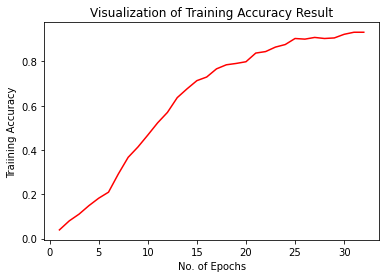

In [46]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()


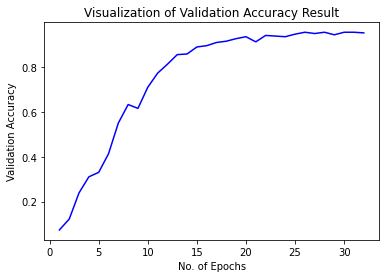

In [47]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [49]:
test_x = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/user/Downloads/AIFINALPROJ/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 359 files belonging to 36 classes.


# Test Accuracy

In [50]:
test_loss,test_acc = cnn.evaluate(test_x)
print('Test accuracy:', test_acc)

12/12 [==============================] - 5s 117ms/step - loss: 0.3163 - accuracy: 0.9526
Test accuracy: 0.9526462554931641


In [51]:
cnn = tf.keras.models.load_model('C:/Users/user/Downloads/AIFINALPROJ/trained_model.h5')

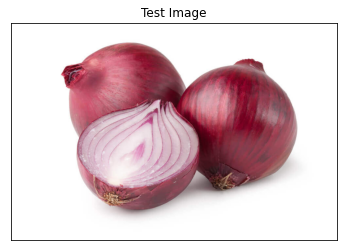

In [52]:
#Test Image Visualization
import cv2
image_path = 'C:/Users/user/Downloads/AIFINALPROJ//test/onion/Image_5.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [53]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 177ms/step


In [54]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

20


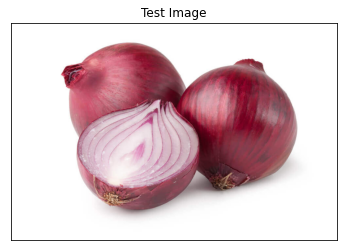

In [55]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [57]:
#Single image Prediction
print("It's a {}".format(test_x.class_names[result_index]))

It's a onion


# ResNet50V2&VGG

# Datasets path for loading

In [16]:
train = Path('C:/Users/user/Downloads/AIFINALPROJ/train')
train_filepaths = list(train.glob(r'**/*.jpg')) 

valid = Path('C:/Users/user/Downloads/AIFINALPROJ/validation')
valid_filepaths = list(valid.glob(r'**/*.jpg'))

test = Path('C:/Users/user/Downloads/AIFINALPROJ/test')
test_filepaths = list(test.glob(r'**/*.jpg'))

# Providing labels for each picture

In [17]:
def process_img(filepath):
    
    labels = [str(filepath[i]).split("/")[-1]
              for i in range(len(filepath))] 
                  
    filepath = pd.Series(filepath, name='FilePath').astype(str)
    labels = pd.Series(labels, name='Label') 
    
    df = pd.concat([filepath, labels], axis=1) 
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [18]:
train_df = process_img(train_filepaths) 
valid_df = process_img(valid_filepaths)
test_df = process_img(test_filepaths)
train_df.head()

FilePath  \
0  C:\Users\user\Downloads\AIFINALPROJ\train\pome...   
1  C:\Users\user\Downloads\AIFINALPROJ\train\pear...   
2  C:\Users\user\Downloads\AIFINALPROJ\train\pine...   
3  C:\Users\user\Downloads\AIFINALPROJ\train\cucu...   
4  C:\Users\user\Downloads\AIFINALPROJ\train\spin...   

                                               Label  
0  C:\Users\user\Downloads\AIFINALPROJ\train\pome...  
1  C:\Users\user\Downloads\AIFINALPROJ\train\pear...  
2  C:\Users\user\Downloads\AIFINALPROJ\train\pine...  
3  C:\Users\user\Downloads\AIFINALPROJ\train\cucu...  
4  C:\Users\user\Downloads\AIFINALPROJ\train\spin...

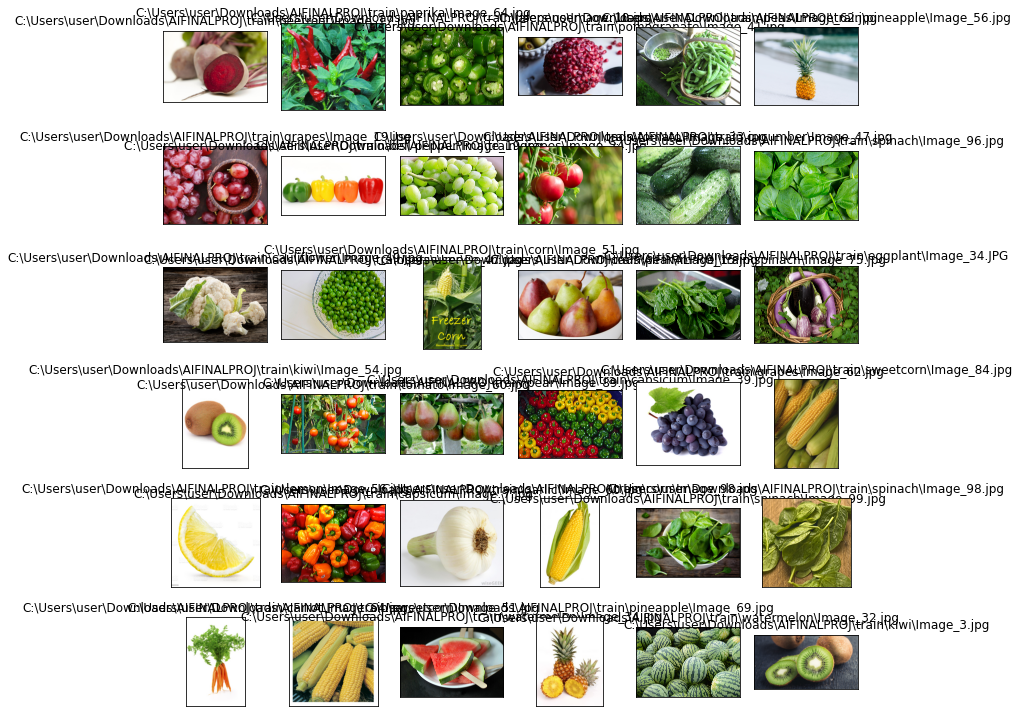

In [29]:
unique_labels = train_df.copy().drop_duplicates(subset=['Label']).reset_index()

fig, axes = plt.subplots(6,6, figsize=(10,10),subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(unique_labels.FilePath[i]))
    ax.set_title(unique_labels.Label[i], fontsize=12)
    
plt.tight_layout()
plt.show()

In [19]:
# Fetch and process the data
#applies specific preprocessing steps to the input images to ensure they are formatted correctly 
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.inception_resnet_v2.preprocess_input
)
train_images = data_gen.flow_from_dataframe(
    dataframe = train_df,
    x_col='FilePath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

valid_images = data_gen.flow_from_dataframe(
    dataframe=valid_df,
    x_col='FilePath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = data_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col='FilePath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2855 validated image filenames belonging to 2855 classes.
Found 340 validated image filenames belonging to 340 classes.
Found 340 validated image filenames belonging to 340 classes.


# Loading the model

In [31]:
base_model = tf.keras.applications.InceptionResNetV2(
    #This option specifies that the final fully connected layer (top) of the model should not be included.
    include_top=False,
    #his option specifies that you want to load the weights pre-trained on the ImageNet dataset. 
    weights='imagenet',
    input_shape=(255,255,3),
    pooling='avg',
)
#we wont change the weights
base_model.trainable = False

In [34]:
pred = model.predict(test_images) 
pred = np.argmax(pred, axis=1)
pred

11/11 [==============================] - 30s 2s/step


array([30, 22, 22, 22, 30, 22, 22, 22, 22, 22, 22, 22, 22, 33, 22, 22, 22,
       22, 22, 22, 22, 30, 22, 22, 22, 19, 22, 30, 22, 18, 13, 22, 22, 33,
       33, 33, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 33, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 19, 22, 22, 22, 22, 33, 22, 19, 30, 30,
       22, 22, 22, 25, 22, 33, 22, 22, 22, 22, 25, 22, 18, 14, 18, 22, 33,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       19, 22, 22, 22, 22, 22, 22, 22, 22, 30, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 19, 22, 22, 33, 22, 22, 22, 22, 18, 22, 22, 22, 22, 22,
       22, 22, 22, 19, 22, 22, 22, 22, 22, 14, 22, 22, 22, 19, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 33, 22, 22, 14, 22, 30, 22, 22, 22, 19, 22,
       22, 22, 22, 22, 22, 30, 22, 22, 22, 22, 22, 22, 22, 22, 22, 30, 22,
       22, 33, 22, 30, 22, 30, 33, 22, 22, 30, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 33, 30, 30, 22, 22, 22, 22, 22, 22,
       33, 25, 22, 22, 22

In [35]:
labels = (train_images.class_indices)
labels

{'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_1.jpg': 0,
 'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_10.jpg': 1,
 'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_16.jpg': 2,
 'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_17.jpg': 3,
 'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_18.jpg': 4,
 'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_19.jpg': 5,
 'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_2.jpg': 6,
 'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_20.jpg': 7,
 'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_21.jpg': 8,
 'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_23.jpg': 9,
 'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_24.jpg': 10,
 'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_25.jpg': 11,
 'C:\\Users\\user\\Downloads\\AIFINALPROJ\\train\\apple\\Image_26.jpg': 12,
 'C:\\Users\\user\\Downl

In [36]:
labels = dict((v,k) for k,v in labels.items()) 
pred = [labels[k] for k in pred] 
y_test = [labels[k] for k in test_images.classes]
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 0.29%


# Loading VGG16 

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers on top of the pre-trained model
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=36, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the paths to your training and validation datasets
train_data_dir = 'C:/Users/user/Downloads/AIFINALPROJ/train'
valid_data_dir = 'C:/Users/user/Downloads/AIFINALPROJ/validation'

# Set up data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load and augment the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Set up data normalization for the validation set
valid_datagen = ImageDataGenerator(rescale=1./255)

# Load the validation dataset
valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=32,
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
)




Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Epoch 1/32
 5/98 [>.............................] - ETA: 1:25 - loss: 4.0079 - accuracy: 0.0437

C:\Users\user\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - 132s 1s/step - loss: 3.3340 - accuracy: 0.1233 - val_loss: 2.5084 - val_accuracy: 0.3875
Epoch 2/32
98/98 [==============================] - 131s 1s/step - loss: 2.7698 - accuracy: 0.2494 - val_loss: 1.8882 - val_accuracy: 0.5527
Epoch 3/32
98/98 [==============================] - 129s 1s/step - loss: 2.4302 - accuracy: 0.3159 - val_loss: 1.5739 - val_accuracy: 0.6325
Epoch 4/32
98/98 [==============================] - 128s 1s/step - loss: 2.2543 - accuracy: 0.3576 - val_loss: 1.3805 - val_accuracy: 0.6866
Epoch 5/32
98/98 [==============================] - 130s 1s/step - loss: 2.0764 - accuracy: 0.4071 - val_loss: 1.1924 - val_accuracy: 0.7066
Epoch 6/32
98/98 [==============================] - 121s 1s/step - loss: 1.9618 - accuracy: 0.4308 - val_loss: 1.0732 - val_accuracy: 0.7664
Epoch 7/32
98/98 [==============================] - 120s 1s/step - loss: 1.8669 - accuracy: 0.4571 - val_loss: 1.0386 - val_accuracy: 0.7664
Epoch 8/32
98/98 [======

In [6]:
history.history #Return Dictionary of history


{'loss': [3.3339617252349854,
  2.7697863578796387,
  2.430206298828125,
  2.254270315170288,
  2.076446294784546,
  1.961840033531189,
  1.8668818473815918,
  1.804457664489746,
  1.6951183080673218,
  1.642885684967041,
  1.5945405960083008,
  1.5356160402297974,
  1.4833751916885376,
  1.4554907083511353,
  1.432327389717102,
  1.378423810005188,
  1.33052396774292,
  1.3156636953353882,
  1.2877224683761597,
  1.2589821815490723,
  1.227347493171692,
  1.2022775411605835,
  1.2079702615737915,
  1.1162705421447754,
  1.1260695457458496,
  1.0793613195419312,
  1.0784212350845337,
  1.0425224304199219,
  1.0411818027496338,
  1.0125874280929565,
  1.0323172807693481,
  0.9859336614608765],
 'accuracy': [0.12327447533607483,
  0.24943819642066956,
  0.3158908486366272,
  0.3576244115829468,
  0.4070625901222229,
  0.4308186173439026,
  0.4571428596973419,
  0.48057785630226135,
  0.49213483929634094,
  0.510754406452179,
  0.5261636972427368,
  0.540930986404419,
  0.5560192465782166

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(valid_generator, steps=len(valid_generator))
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)

# Save the trained model
model.save('vgg_model.h5')

11/11 [==============================] - 15s 1s/step - loss: 0.4573 - accuracy: 0.9003
Validation Loss: 0.4573248326778412
Validation Accuracy: 0.9002848863601685


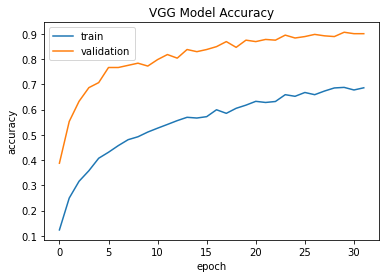

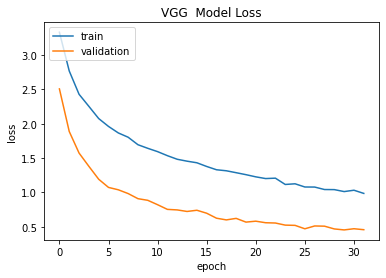

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG  Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [11]:

#Training set Accuracy
train_loss, train_acc = model.evaluate(train_generator)
print('Training accuracy:', train_acc)
     

33/98 [=========>....................] - ETA: 1:08 - loss: 0.5955 - accuracy: 0.8504

C:\Users\user\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - 104s 1s/step - loss: 0.5922 - accuracy: 0.8520
Training accuracy: 0.8520064353942871


In [21]:
test_x = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/user/Downloads/AIFINALPROJ/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 359 files belonging to 36 classes.


In [22]:
test_loss,test_acc = model.evaluate(test_x)
print('Test accuracy:', test_acc)

12/12 [==============================] - 4s 197ms/step - loss: 99.3777 - accuracy: 0.3788
Test accuracy: 0.37883007526397705


# ALEXNET MODEL

In [3]:
import os
import cv2
import glob as gb
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow.keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D,Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from tensorflow.keras.backend.tensorflow_backend import set_session
from tensorflow.python.keras.backend import set_session 
import argparse
# Import necessary components to build LeNet
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.regularizers import l2

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

In [4]:
IMGSIZE= 100
trdata = ImageDataGenerator(rescale=1/255)#rescale=1/255
traindata = trdata.flow_from_directory(shuffle=True,batch_size=100,directory='C:/Users/user/Downloads/AIFINALPROJ/train',target_size=(IMGSIZE,IMGSIZE))
vldata = ImageDataGenerator(rescale=1/255)#rescale=1/255
validdata = vldata.flow_from_directory(batch_size=32,directory='C:/Users/user/Downloads/AIFINALPROJ/validation', target_size=(IMGSIZE,IMGSIZE))
tsdata = ImageDataGenerator(rescale=1/255)#rescale=1/255
testdata = tsdata.flow_from_directory(batch_size=32,directory='C:/Users/user/Downloads/AIFINALPROJ/test', target_size=(IMGSIZE,IMGSIZE))

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


In [5]:
IMGSIZE= 100
def alexnet_model(img_shape=(IMGSIZE, IMGSIZE, 3), n_classes=36, l2_reg=0.,
    weights=None):

    # Initialize model
    alexnet = Sequential()

    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), input_shape=img_shape,
    padding='same', kernel_regularizer=l2(l2_reg)))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 3
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(512, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 4
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(1024, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))

    # Layer 5
    alexnet.add(ZeroPadding2D((1, 1)))
    alexnet.add(Conv2D(1024, (3, 3), padding='same'))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(2, 2)))

    # Layer 6
    alexnet.add(Flatten())
    alexnet.add(Dense(3072))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(Dropout(0.5))

    # Layer 7
    alexnet.add(Dense(4096))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('relu'))
    alexnet.add(Dropout(0.5))

    # Layer 8
    alexnet.add(Dense(n_classes))
    alexnet.add(BatchNormalization())
    alexnet.add(Activation('softmax'))

#     if weights is not None:
#     alexnet.load_weights(weights)

    return alexnet

In [6]:
alexnet = alexnet_model()

In [7]:
optimizer = Adam()#learning_rate=0.001
alexnet.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


In [8]:
alexnethistory = alexnet.fit(traindata,epochs=25,validation_data=validdata)


Epoch 1/25
 3/32 [=>............................] - ETA: 4:37 - loss: 3.8500 - accuracy: 0.0279

C:\Users\user\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


32/32 [==============================] - 595s 19s/step - loss: 3.1373 - accuracy: 0.1342 - val_loss: 106.9477 - val_accuracy: 0.0399
Epoch 2/25
32/32 [==============================] - 591s 18s/step - loss: 2.5723 - accuracy: 0.2674 - val_loss: 16.4978 - val_accuracy: 0.0484
Epoch 3/25
32/32 [==============================] - 624s 19s/step - loss: 2.3401 - accuracy: 0.3483 - val_loss: 6.4142 - val_accuracy: 0.1311
Epoch 4/25
32/32 [==============================] - 620s 19s/step - loss: 2.1691 - accuracy: 0.3897 - val_loss: 3.2263 - val_accuracy: 0.1852
Epoch 5/25
32/32 [==============================] - 977s 30s/step - loss: 2.0263 - accuracy: 0.4514 - val_loss: 2.2599 - val_accuracy: 0.3704
Epoch 6/25
32/32 [==============================] - 731s 23s/step - loss: 1.9288 - accuracy: 0.4620 - val_loss: 2.4422 - val_accuracy: 0.3875
Epoch 7/25
32/32 [==============================] - 772s 24s/step - loss: 1.7900 - accuracy: 0.5059 - val_loss: 2.0848 - val_accuracy: 0.4160
Epoch 8/25
32/

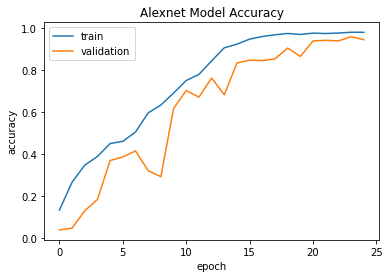

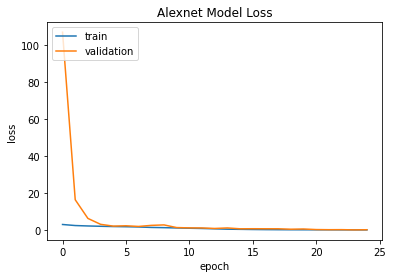

In [9]:

plt.plot(alexnethistory.history['accuracy'])
plt.plot(alexnethistory.history['val_accuracy'])
plt.title('Alexnet Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(alexnethistory.history['loss'])
plt.plot(alexnethistory.history['val_loss'])
plt.title('Alexnet Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
_, test_acc = alexnet.evaluate(testdata, verbose=0)
test_acc

0.9442896842956543

In [8]:

#Training set Accuracy
trainalex=train_loss, train_acc = alex_model.h5.evaluate(traindata)
print('Training accuracy:', trainalex)
     

 3/32 [=>............................] - ETA: 2:23 - loss: 3.5834 - accuracy: 0.0300

C:\Users\user\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


32/32 [==============================] - 160s 5s/step - loss: 3.5834 - accuracy: 0.0334
Training accuracy: [3.5834219455718994, 0.03338683769106865]


In [12]:
#Validation set Accuracy
val_loss, val_acc = alexnet.evaluate(validdata)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 21s 2s/step - loss: 0.3006 - accuracy: 0.9459
Validation accuracy: 0.945868968963623


In [13]:
alexnet.save('alex_model.h5')

In [14]:
alexnethistory.history #Return Dictionary of history


{'loss': [3.1372928619384766,
  2.572291374206543,
  2.340113401412964,
  2.169121026992798,
  2.0263326168060303,
  1.9287527799606323,
  1.7900090217590332,
  1.5474727153778076,
  1.4279855489730835,
  1.2600313425064087,
  1.1151319742202759,
  0.9798809289932251,
  0.7970439791679382,
  0.6069601774215698,
  0.5204982161521912,
  0.4301649332046509,
  0.36683499813079834,
  0.3254684805870056,
  0.29211172461509705,
  0.27967843413352966,
  0.2638549506664276,
  0.2577945590019226,
  0.23309610784053802,
  0.22158411145210266,
  0.2071114331483841],
 'accuracy': [0.1341894119977951,
  0.26741573214530945,
  0.3483146131038666,
  0.3897271156311035,
  0.4513643682003021,
  0.46195825934410095,
  0.5059390068054199,
  0.5974317789077759,
  0.6346709728240967,
  0.6918138265609741,
  0.7515248656272888,
  0.7804173231124878,
  0.8449438214302063,
  0.907223105430603,
  0.9245585799217224,
  0.9486356377601624,
  0.9611557126045227,
  0.9691813588142395,
  0.9756019115447998,
  0.9707

In [22]:
alxvalid=format(alexnethistory.history['val_accuracy'][-1]*100)
print(alxvalid)

94.5868968963623


In [16]:
test_x = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/user/Downloads/AIFINALPROJ/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 359 files belonging to 36 classes.


In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [23]:
from tabulate import tabulate

# Assuming you have the accuracy values for three models: test_acc_model1, val_acc_model1, train_acc_model1,
# test_acc_model2, val_acc_model2, train_acc_model2, test_acc_model3, val_acc_model3, train_acc_model3
accuracy_data = [
    ["CNN", 0.9526462554931641, 0.9515669345855713, 0.9871588945388794],
    ["ResNet50V2", 0.37883007526397705, 0.9002848863601685, 0.8520064353942871],
    ["AlexNET", 0.9442896842956543, 0.945868968963623, 0.9810593724250793]
]

# Specify the table headers
headers = ["Model", "Test Accuracy", "Validation Accuracy", "Training Accuracy"]

# Print the table using tabulate
table = tabulate(accuracy_data, headers, tablefmt="grid")
print(table)


+------------+-----------------+-----------------------+---------------------+
| Model      |   Test Accuracy |   Validation Accuracy |   Training Accuracy |
+============+=================+=======================+=====================+
| CNN        |        0.952646 |              0.951567 |            0.987159 |
+------------+-----------------+-----------------------+---------------------+
| ResNet50V2 |        0.37883  |              0.900285 |            0.852006 |
+------------+-----------------+-----------------------+---------------------+
| AlexNET    |        0.94429  |              0.945869 |            0.981059 |
+------------+-----------------+-----------------------+---------------------+


# CNN REPORT

In [39]:
import matplotlib.pyplot as plt #for image and graph ploting
%matplotlib inline
import numpy as np #for array and multidimensional array
import os #for accesing and saving files
import PIL #for image load
import sklearn.metrics #for metrics
import tensorflow as tf #api for CNN
#for building the CNN model
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import seaborn as sns #for test and measurements
import pandas as pd #for dataframes
from keras import models #for loading models
import pickle #another way to save model 
from keras.utils import load_img
batch_size = 10
img_height = 64
img_width = 64
test_ds = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/user/Downloads/AIFINALPROJ/test",
    image_size=(img_height, img_width),
    batch_size=batch_size
 )


Found 359 files belonging to 36 classes.


In [40]:
class_names = np.array(test_ds.class_names)
num_classes = len(class_names) #size of the labels
print(class_names)

['apple' 'banana' 'beetroot' 'bell pepper' 'cabbage' 'capsicum' 'carrot'
 'cauliflower' 'chilli pepper' 'corn' 'cucumber' 'eggplant' 'garlic'
 'ginger' 'grapes' 'jalepeno' 'kiwi' 'lemon' 'lettuce' 'mango' 'onion'
 'orange' 'paprika' 'pear' 'peas' 'pineapple' 'pomegranate' 'potato'
 'raddish' 'soy beans' 'spinach' 'sweetcorn' 'sweetpotato' 'tomato'
 'turnip' 'watermelon']


In [41]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize empty numpy arrays to store predicted classes and true labels
predictions = np.array([])
labels = np.array([])

# Iterate through the test dataset
for x, y in test_ds:
  # Use the model to predict the class probabilities of the input data
  predict_x = model.predict(x) 
  # Convert the predicted probabilities to class predictions
  classes_x = np.argmax(predict_x, axis=1) 
  # Add the predicted classes and true labels to the numpy arrays
  predictions = np.concatenate([predictions, classes_x])
  labels = np.concatenate([labels, np.array(y)])

# Convert the numerical labels to class names using a dictionary
label_names = {i: class_names[i] for i in range(len(class_names))}

1/1 [==============================] - 0s 26ms/step


In [42]:
model=load_model('C:/Users/user/Downloads/AIFINALPROJ/trained_model.h5')

for x, y in test_ds:
  # Use the model to predict the class probabilities of the input data

  predict_x = model.predict(x) 
  # Convert the predicted probabilities to class predictions
  classes_x = np.argmax(predict_x, axis=1) 
  # Add the predicted classes and true labels to the numpy arrays
  predictions = np.concatenate([predictions, classes_x])
  labels = np.concatenate([labels, np.array(y)])

# Generate a classification report
report = classification_report(labels, predictions, target_names=class_names)

# Print the classification report
print(report)

1/1 [==============================] - 0s 23ms/step
               precision    recall  f1-score   support

        apple       1.00      0.70      0.82        20
       banana       1.00      0.89      0.94        18
     beetroot       1.00      1.00      1.00        20
  bell pepper       0.82      0.90      0.86        20
      cabbage       0.83      1.00      0.91        20
     capsicum       0.90      0.90      0.90        20
       carrot       0.90      0.90      0.90        20
  cauliflower       1.00      1.00      1.00        20
chilli pepper       1.00      0.90      0.95        20
         corn       1.00      0.70      0.82        20
     cucumber       1.00      1.00      1.00        20
     eggplant       1.00      1.00      1.00        20
       garlic       1.00      1.00      1.00        20
       ginger       1.00      1.00      1.00        20
       grapes       1.00      1.00      1.00        20
     jalepeno       0.91      1.00      0.95        20
         kiw

# VGG NET REPORT

In [77]:
import os
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your train and test data folders
train_data_dir = 'C:/Users/user/Downloads/AIFINALPROJ/train'
test_data_dir = 'C:/Users/user/Downloads/AIFINALPROJ/test'

# Define the path to your VGG model
model_path = 'C:/Users/user/Downloads/AIFINALPROJ/vgg_model.h5'

# Load the VGG model
model = load_model(model_path)

# Set up the image data generator for the test data
test_data_generator = ImageDataGenerator(rescale=1./255)

# Set the batch size for the test data generator
batch_size = 32

# Generate the test dataset from the test data directory
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the true labels for the test dataset
labels = test_generator.classes

# Predict the class probabilities for the test dataset
predictions = model.predict(test_generator, verbose=1)

# Convert the predicted probabilities to class predictions
predicted_classes = np.argmax(predictions, axis=1)

# Get the class names from the test generator
class_names = list(test_generator.class_indices.keys())

# Generate the classification report
report = classification_report(labels, predicted_classes, target_names=class_names)

# Print the classification report
print(report)


Found 359 images belonging to 36 classes.
12/12 [==============================] - 17s 1s/step
               precision    recall  f1-score   support

        apple       0.75      0.60      0.67        10
       banana       1.00      0.78      0.88         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.67      1.00      0.80        10
      cabbage       1.00      1.00      1.00        10
     capsicum       1.00      0.50      0.67        10
       carrot       0.91      1.00      0.95        10
  cauliflower       0.91      1.00      0.95        10
chilli pepper       0.80      0.80      0.80        10
         corn       0.80      0.80      0.80        10
     cucumber       1.00      1.00      1.00        10
     eggplant       0.83      1.00      0.91        10
       garlic       0.91      1.00      0.95        10
       ginger       1.00      0.70      0.82        10
       grapes       0.82      0.90      0.86        10
     jalepeno       1.00

# ALEXNET REPORT

In [1]:
import os
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your train and test data folders
train_data_dir = 'C:/Users/user/Downloads/AIFINALPROJ/train'
test_data_dir = 'C:/Users/user/Downloads/AIFINALPROJ/test'

# Define the path to your VGG model
model_path = 'C:/Users/user/Downloads/AIFINALPROJ/alex_model.h5'

# Load the VGG model
model = load_model(model_path)

# Set up the image data generator for the test data
test_data_generator = ImageDataGenerator(rescale=1./255)

# Set the batch size for the test data generator
batch_size = 32

# Generate the test dataset from the test data directory
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get the true labels for the test dataset
labels = test_generator.classes

# Predict the class probabilities for the test dataset
predictions = model.predict(test_generator, verbose=1)

# Convert the predicted probabilities to class predictions
predicted_classes = np.argmax(predictions, axis=1)

# Get the class names from the test generator
class_names = list(test_generator.class_indices.keys())

# Generate the classification report
report = classification_report(labels, predicted_classes, target_names=class_names)

# Print the classification report
print(report)


Found 359 images belonging to 36 classes.
12/12 [==============================] - 24s 2s/step
               precision    recall  f1-score   support

        apple       1.00      0.70      0.82        10
       banana       1.00      0.89      0.94         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       1.00      0.90      0.95        10
      cabbage       1.00      1.00      1.00        10
     capsicum       0.83      1.00      0.91        10
       carrot       1.00      1.00      1.00        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.90      0.95        10
         corn       0.82      0.90      0.86        10
     cucumber       1.00      1.00      1.00        10
     eggplant       0.91      1.00      0.95        10
       garlic       1.00      1.00      1.00        10
       ginger       0.83      1.00      0.91        10
       grapes       1.00      1.00      1.00        10
     jalepeno       0.91